## Fastai implementation of combat finder

### First import fastai libraries and then load the data with resnet 18 architecture and needed metrics

In [2]:
from fastai.vision import *

In [3]:
#smaller network increase the batch size to 256 so that we can improve the accuracy
path = '/home/malar/prject_vision/dataset/'
data = ImageDataBunch.from_folder(path,size=224,bs = 64,ds_tfms=get_transforms()).normalize(imagenet_stats)


resnet18 = cnn_learner(data, models.resnet18, ps = 0.5,metrics=[error_rate,accuracy])

### Find the learning rate with the inbuild fastai library (lr_find)

In [4]:
resnet18.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


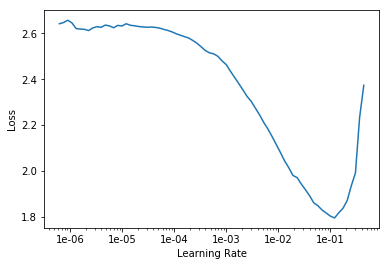

In [5]:
resnet18.recorder.plot()

#### Wisely choose the learning rate in this case the slope starts somewhere near 5e-3 and then slice the learning rate to train it from 5e-4 to 5e-3 for 5 epochs

In [6]:
lr =5e-3
resnet18.fit_one_cycle(5, slice(lr/10, lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.329446,0.613144,0.189246,0.810754,14:41
1,0.226588,0.728747,0.178605,0.821395,01:44
2,0.140804,0.764958,0.161125,0.838875,01:51
3,0.099668,0.752850,0.163975,0.836025,01:46
4,0.077229,0.803836,0.167585,0.832415,01:44


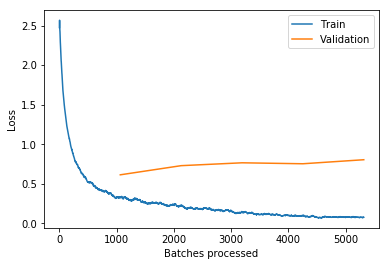

In [7]:
resnet18.recorder.plot_losses()

In [8]:
resnet18.save('resnet18')

### Tools to intepret the classification results.

In [9]:
interp = ClassificationInterpretation.from_learner(resnet18)

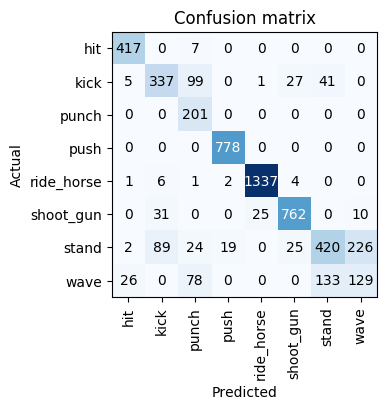

In [10]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=100)

In [11]:
interp.most_confused(min_val=2)

[('stand', 'wave', 226),
 ('wave', 'stand', 133),
 ('kick', 'punch', 99),
 ('stand', 'kick', 89),
 ('wave', 'punch', 78),
 ('kick', 'stand', 41),
 ('shoot_gun', 'kick', 31),
 ('kick', 'shoot_gun', 27),
 ('wave', 'hit', 26),
 ('shoot_gun', 'ride_horse', 25),
 ('stand', 'shoot_gun', 25),
 ('stand', 'punch', 24),
 ('stand', 'push', 19),
 ('shoot_gun', 'wave', 10),
 ('hit', 'punch', 7),
 ('ride_horse', 'kick', 6),
 ('kick', 'hit', 5),
 ('ride_horse', 'shoot_gun', 4),
 ('ride_horse', 'push', 2),
 ('stand', 'hit', 2)]

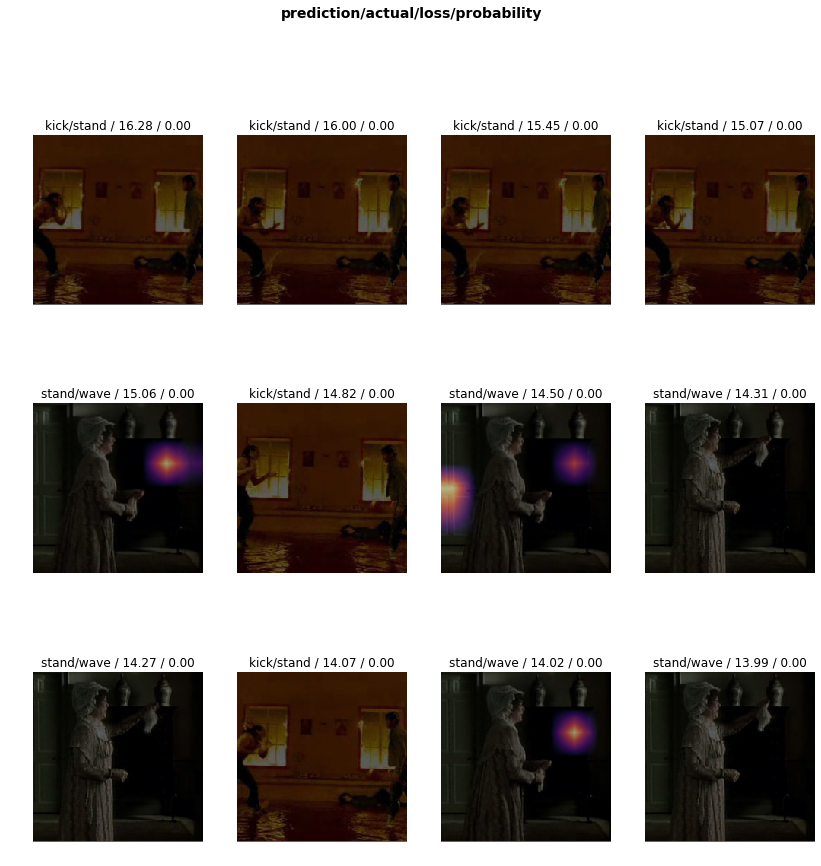

In [12]:
interp.plot_top_losses(12, figsize=(14,14))

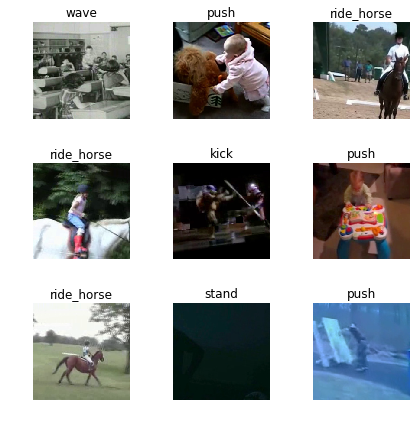

In [13]:
data.show_batch(rows=3, figsize=(6,6))

## Resnet 34

In [14]:
#smaller network increase the batch size to 256 so that we can improve the accuracy
path = '/home/malar/prject_vision/dataset/'
data = ImageDataBunch.from_folder(path,size=224,bs = 64,ds_tfms=get_transforms()).normalize(imagenet_stats)


resnet34 = cnn_learner(data, models.resnet34, ps = 0.5,metrics=[error_rate,accuracy])

In [15]:
resnet34.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


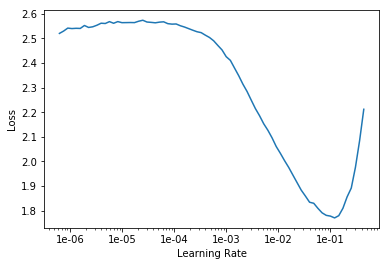

In [16]:
resnet34.recorder.plot()

In [17]:
lr =5e-3
resnet34.fit_one_cycle(5, slice(lr/10, lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.294139,0.483326,0.156755,0.843245,01:54
1,0.188204,0.719685,0.179935,0.820065,01:55
2,0.125800,0.815583,0.161315,0.838685,01:55
3,0.075801,0.721093,0.157515,0.842485,01:55
4,0.052852,0.783460,0.155615,0.844385,01:52


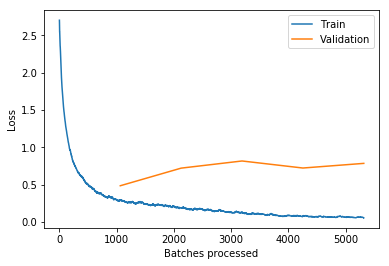

In [18]:
resnet34.recorder.plot_losses()

In [19]:
resnet34.save('resnet34')

In [20]:
interp = ClassificationInterpretation.from_learner(resnet34)

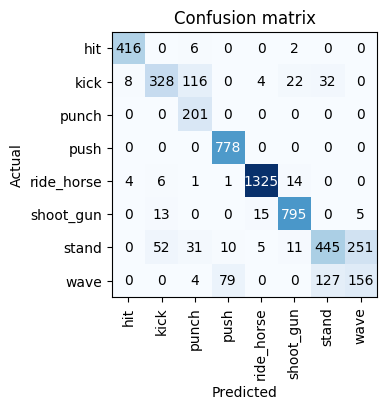

In [21]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=100)

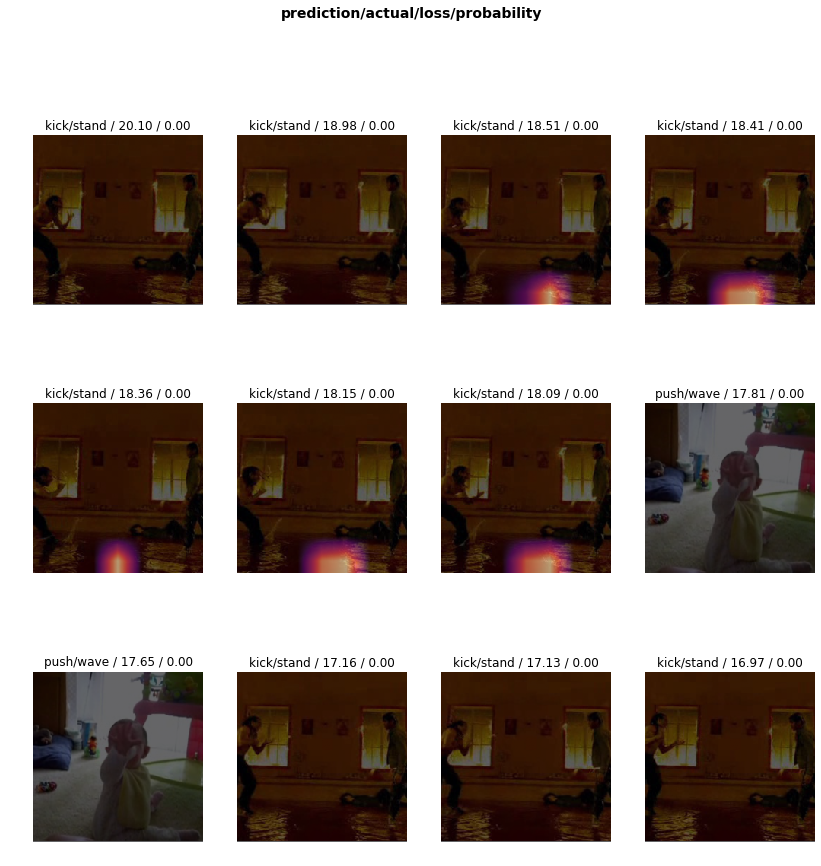

In [22]:
interp.plot_top_losses(12, figsize=(14,14))

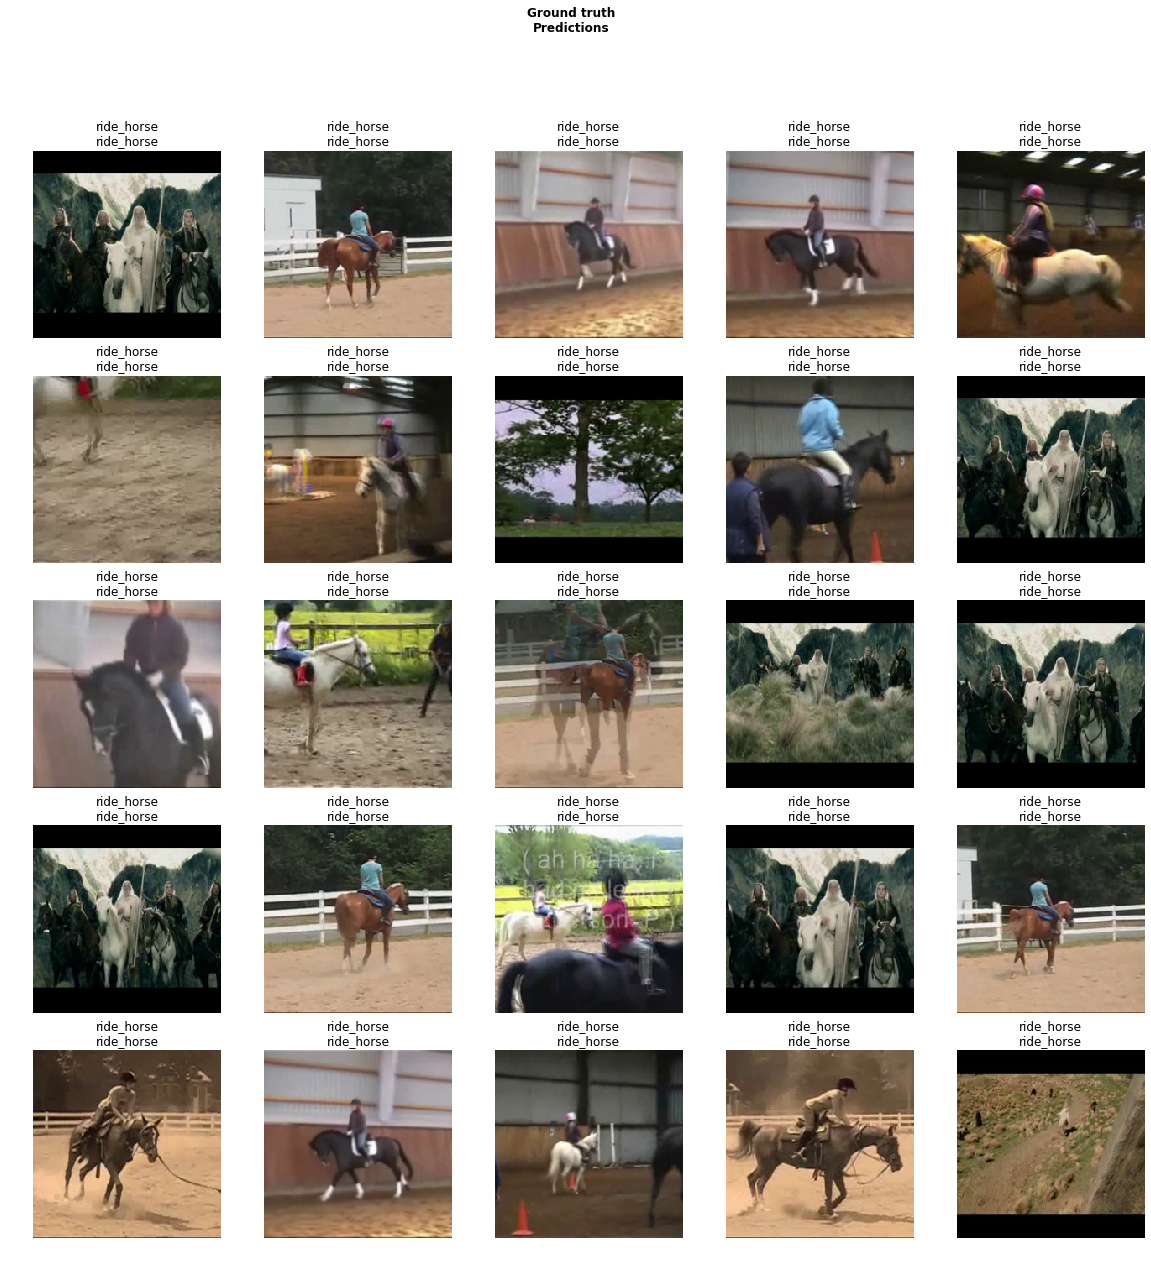

In [23]:
resnet34.show_results()

## Resnet 50

In [28]:
#smaller network increase the batch size to 256 so that we can improve the accuracy
path = '/home/malar/prject_vision/dataset/'
data = ImageDataBunch.from_folder(path,size=224,bs = 64,ds_tfms=get_transforms()).normalize(imagenet_stats)


resnet50 = cnn_learner(data, models.resnet50, ps = 0.5,metrics=[error_rate,accuracy])

In [29]:
resnet50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


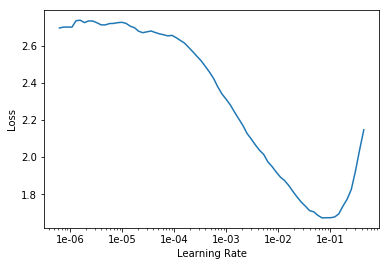

In [30]:
resnet50.recorder.plot() 

In [31]:
lr =5e-3
resnet50.fit_one_cycle(5, slice(lr/10, lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.223731,0.520714,0.160555,0.839445,03:21
1,0.140842,0.663521,0.158845,0.841155,03:20
2,0.087299,0.596536,0.134714,0.865286,03:20
3,0.039987,0.865091,0.150675,0.849325,03:20
4,0.025478,0.875456,0.149724,0.850276,03:20


In [32]:
interp = ClassificationInterpretation.from_learner(resnet50)

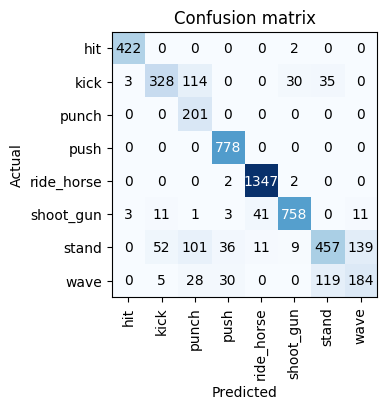

In [33]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=100)

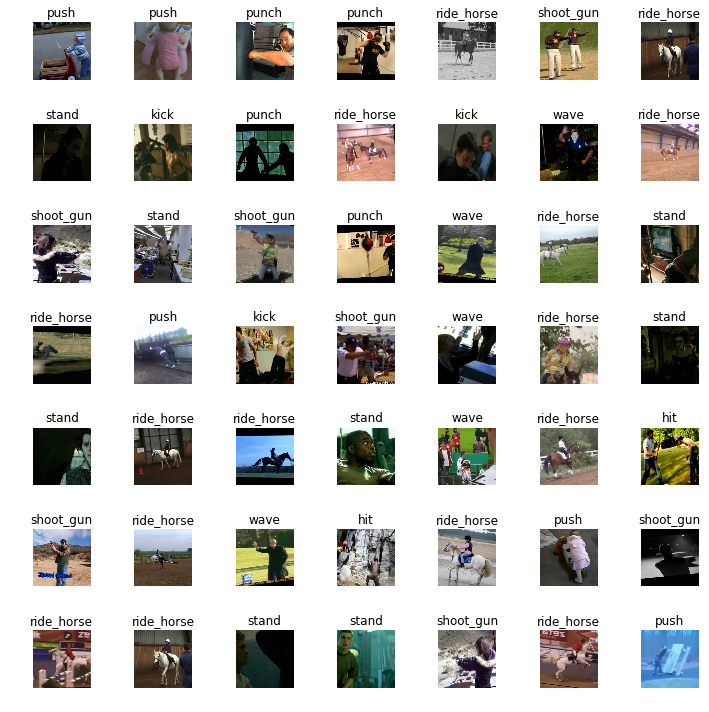

In [34]:
data.show_batch(rows=7, figsize=(10,10))